In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import scipy as stats

In [3]:
housetrain=pd.read_csv('train.csv')

In [4]:
housetrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housetrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

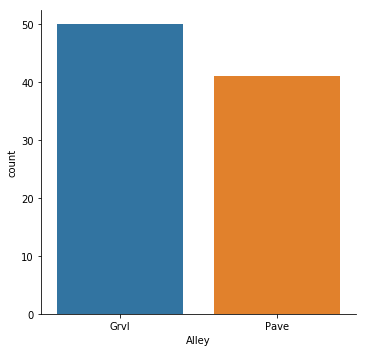

In [7]:
sns.catplot('Alley',kind='count',data=housetrain)

In [8]:
housetrain['LotFrontage'].min()

21.0

In [9]:
housetrain['LotFrontage'].max()

313.0

In [10]:
x=np.arange(20,320,10)

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 48.,  50., 107.,  99., 297., 247., 172.,  78.,  48.,  18.,  14.,
          8.,   4.,   4.,   1.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 21.        ,  30.73333333,  40.46666667,  50.2       ,
         59.93333333,  69.66666667,  79.4       ,  89.13333333,
         98.86666667, 108.6       , 118.33333333, 128.06666667,
        137.8       , 147.53333333, 157.26666667, 167.        ,
        176.73333333, 186.46666667, 196.2       , 205.93333333,
        215.66666667, 225.4       , 235.13333333, 244.86666667,
        254.6       , 264.33333333, 274.06666667, 283.8       ,
        293.53333333, 303.26666667, 313.        ]),
 <a list of 30 Patch objects>)

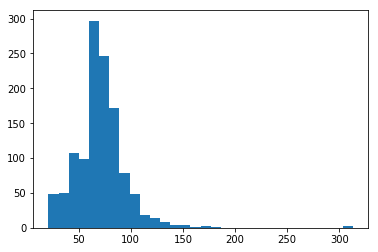

In [11]:
plt.hist(x=housetrain['LotFrontage'],bins=30)

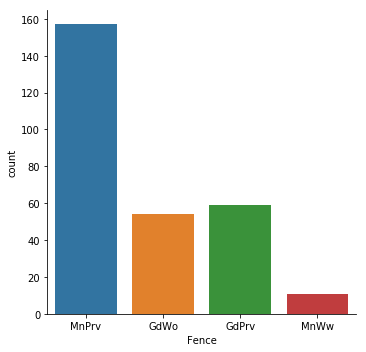

In [12]:
sns.catplot('Fence',kind='count',data=housetrain)

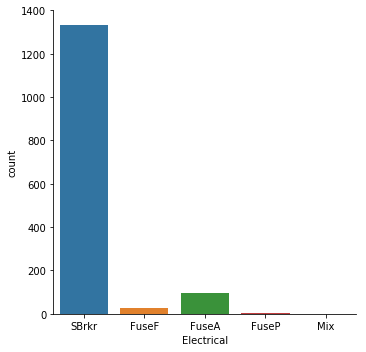

In [13]:
sns.catplot('Electrical',kind='count',data=housetrain)

In [14]:
housetrain['Electrical']=housetrain['Electrical'].fillna('SBrkr')

In [15]:
housetrain['LotArea'].min()

1300

In [16]:
housetrain['LotArea'].max()

215245

(array([174., 641., 485.,  99.,  24.,  12.,   3.,   5.,   3.,   1.,   2.,
          1.,   3.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1300. ,   5578.9,   9857.8,  14136.7,  18415.6,  22694.5,
         26973.4,  31252.3,  35531.2,  39810.1,  44089. ,  48367.9,
         52646.8,  56925.7,  61204.6,  65483.5,  69762.4,  74041.3,
         78320.2,  82599.1,  86878. ,  91156.9,  95435.8,  99714.7,
        103993.6, 108272.5, 112551.4, 116830.3, 121109.2, 125388.1,
        129667. , 133945.9, 138224.8, 142503.7, 146782.6, 151061.5,
        155340.4, 159619.3, 163898.2, 168177.1, 172456. , 176734.9,
        181013.8, 185292.7, 189571.6, 193850.5, 198129.4, 202408.3,
        206687.2, 210966.1, 215245. ]),
 <a list of 50 Patch objects>)

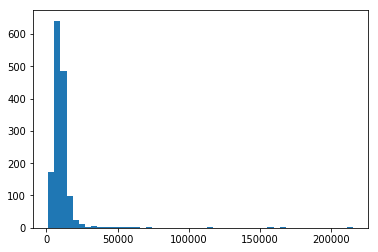

In [17]:
plt.hist(x=housetrain['LotArea'],bins=50)

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


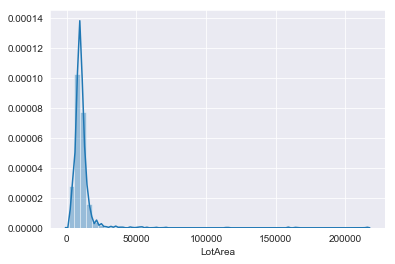

In [18]:
sns.set_style('darkgrid')
sns.distplot(housetrain['LotArea'])

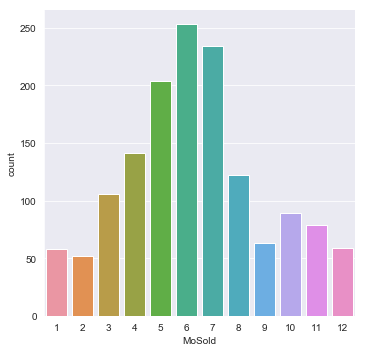

In [19]:
sns.catplot('MoSold',kind='count',data=housetrain)

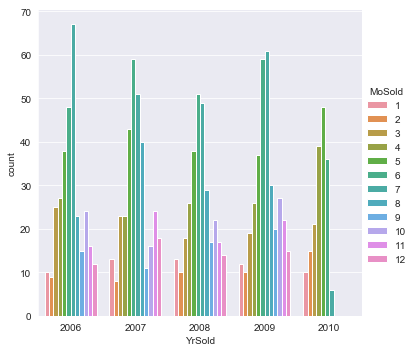

In [20]:
sns.catplot('YrSold',kind='count',data=housetrain,hue='MoSold')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


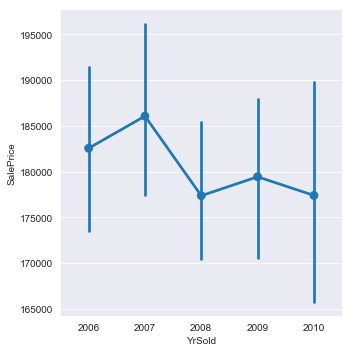

In [21]:
sns.factorplot('YrSold','SalePrice',data=housetrain)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


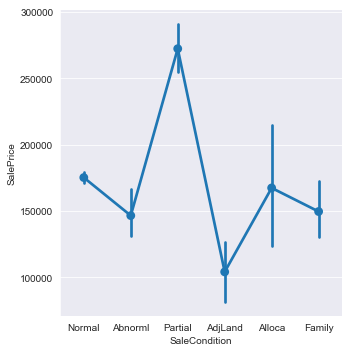

In [22]:
sns.factorplot('SaleCondition','SalePrice',data=housetrain)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


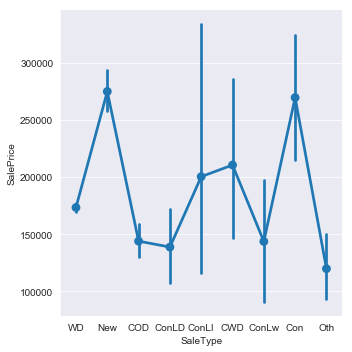

In [23]:
sns.factorplot('SaleType','SalePrice',data=housetrain)

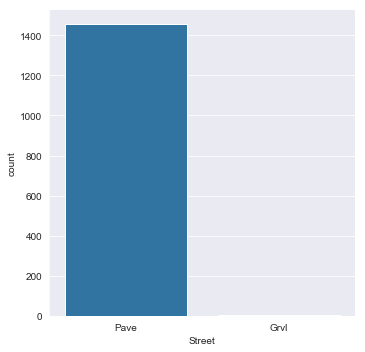

In [24]:
sns.catplot('Street',kind='count',data=housetrain)

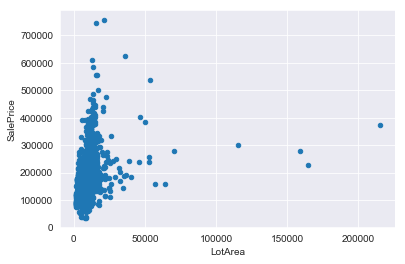

In [25]:
housetrain.plot.scatter(x='LotArea',y='SalePrice')

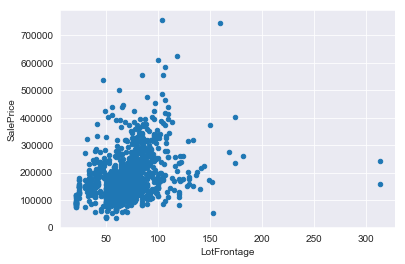

In [26]:
housetrain.plot.scatter(x='LotFrontage',y='SalePrice')

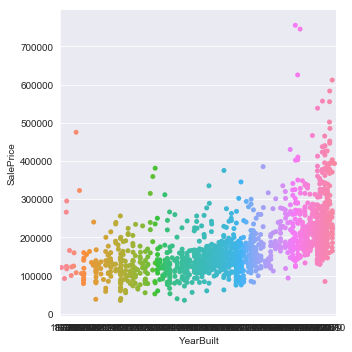

In [27]:
sns.catplot('YearBuilt','SalePrice',data=housetrain,)

(array([  2.,   7.,   4.,   2.,  13.,  24.,  66.,  56.,  33.,  50.,  35.,
         93., 131., 130., 112., 111.,  40.,  99., 176., 276.]),
 array([1872. , 1878.9, 1885.8, 1892.7, 1899.6, 1906.5, 1913.4, 1920.3,
        1927.2, 1934.1, 1941. , 1947.9, 1954.8, 1961.7, 1968.6, 1975.5,
        1982.4, 1989.3, 1996.2, 2003.1, 2010. ]),
 <a list of 20 Patch objects>)

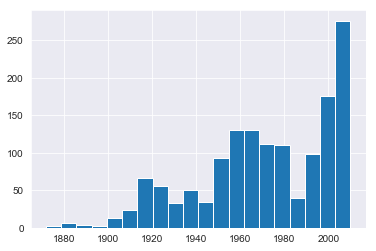

In [28]:
plt.hist(x=housetrain['YearBuilt'],bins=20)

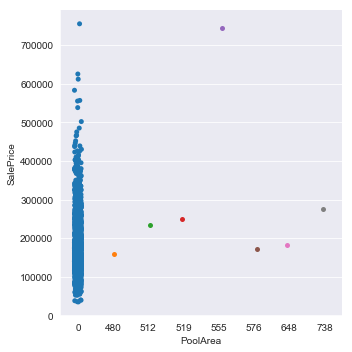

In [29]:
sns.catplot('PoolArea','SalePrice',data=housetrain,)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


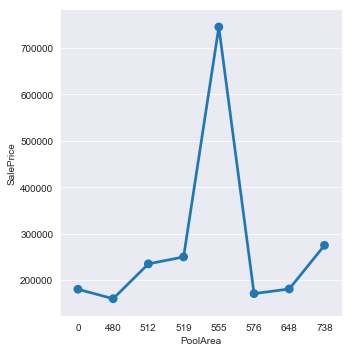

In [30]:
sns.factorplot('PoolArea','SalePrice',data=housetrain,)

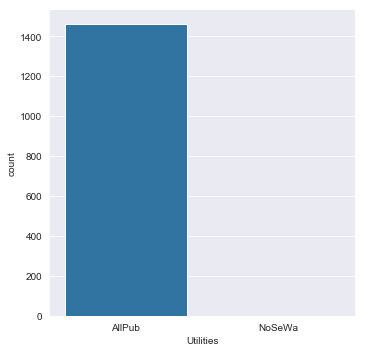

In [31]:
sns.catplot('Utilities',data=housetrain,kind='count')

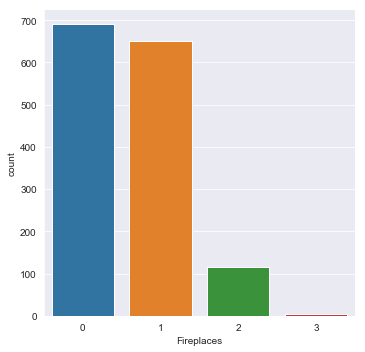

In [32]:
sns.catplot('Fireplaces',data=housetrain,kind='count')

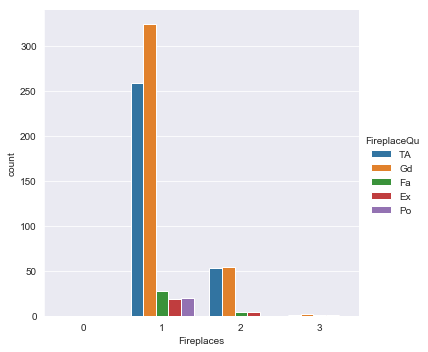

In [33]:
sns.catplot('Fireplaces',data=housetrain,kind='count',hue='FireplaceQu')

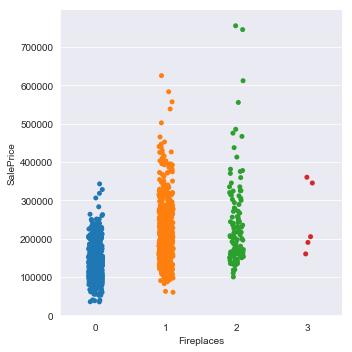

In [34]:
sns.catplot('Fireplaces','SalePrice',data=housetrain)

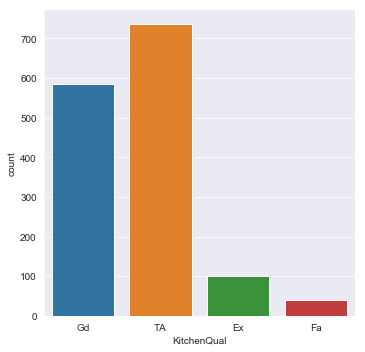

In [35]:
sns.catplot('KitchenQual',data=housetrain,kind='count')

In [36]:
housetrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


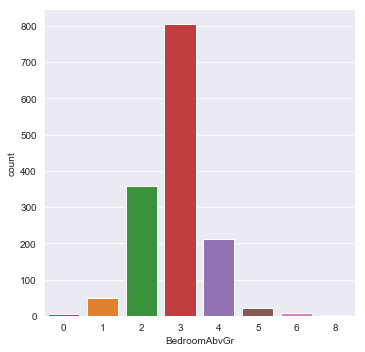

In [37]:
sns.catplot('BedroomAbvGr',data=housetrain,kind='count')

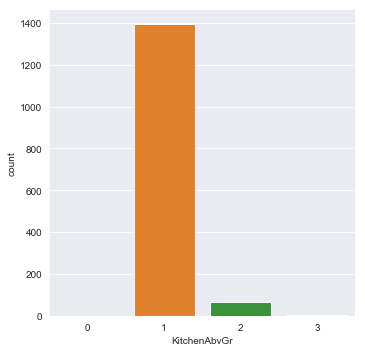

In [38]:
sns.catplot('KitchenAbvGr',data=housetrain,kind='count')

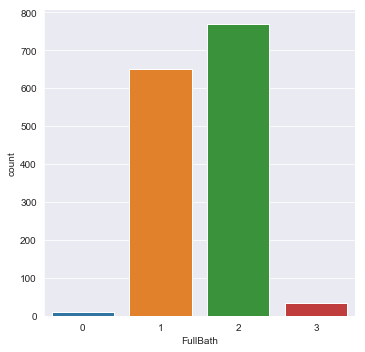

In [39]:
sns.catplot('FullBath',data=housetrain,kind='count')

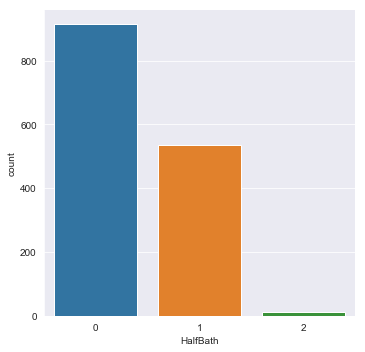

In [40]:
sns.catplot('HalfBath',data=housetrain,kind='count')

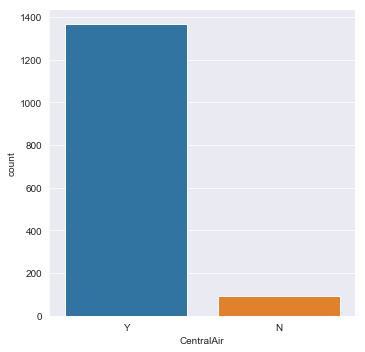

In [41]:
sns.catplot('CentralAir',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


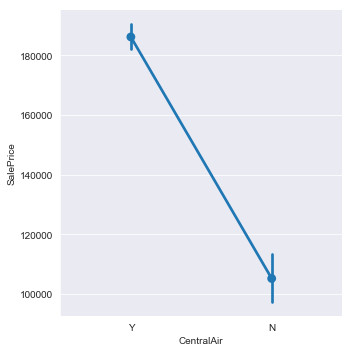

In [42]:
sns.factorplot('CentralAir','SalePrice',data=housetrain)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


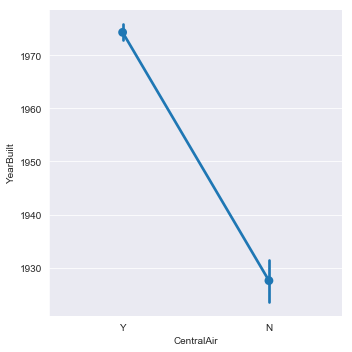

In [43]:
sns.factorplot('CentralAir','YearBuilt',data=housetrain)

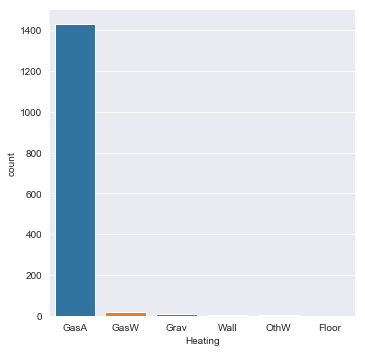

In [44]:
sns.catplot('Heating' ,data=housetrain,kind='count')

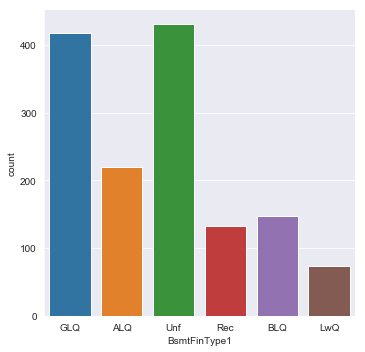

In [45]:
sns.catplot('BsmtFinType1',data=housetrain,kind='count')

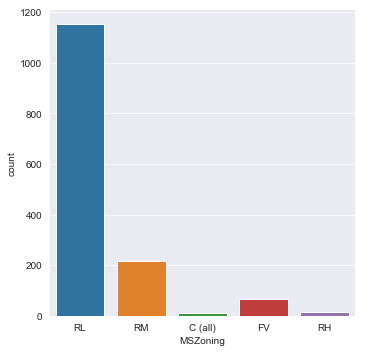

In [46]:
sns.catplot('MSZoning',data=housetrain,kind='count')

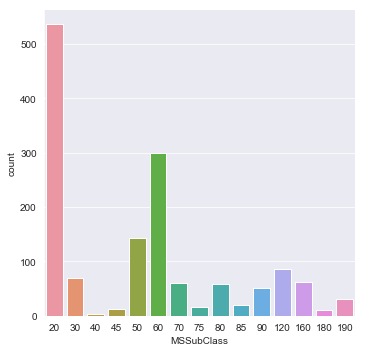

In [47]:
sns.catplot('MSSubClass',data=housetrain,kind='count')

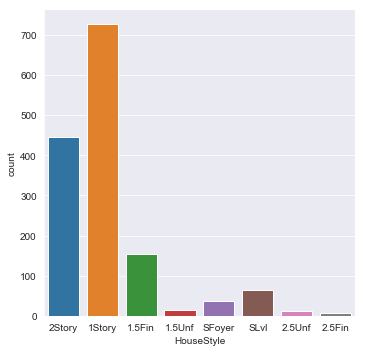

In [48]:
sns.catplot('HouseStyle',data=housetrain,kind='count')

In [49]:
test=pd.read_csv('test.csv')

In [50]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [51]:
test.isnull().any()

Id               False
MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities         True
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st       True
Exterior2nd       True
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual       True
TotRmsAbvGrd     False
Functional        True
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars        True
GarageArea 

In [52]:
housetrain['LotFrontage']=housetrain['LotFrontage'].fillna(housetrain['LotFrontage'].mean())
housetrain['MasVnrArea']=housetrain['MasVnrArea'].fillna(0)


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [54]:
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['MasVnrArea']=test['MasVnrArea'].fillna(0)


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [56]:
housetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [57]:
test['MSZoning']=test['MSZoning'].fillna('RL')

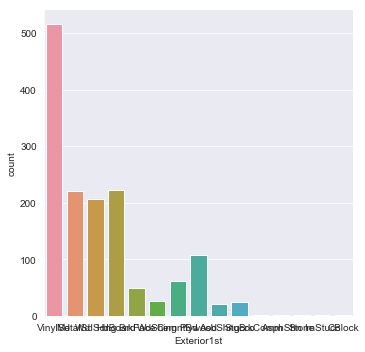

In [58]:
sns.catplot('Exterior1st',data=housetrain,kind='count')

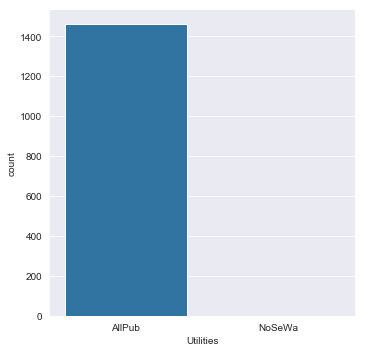

In [59]:
sns.catplot('Utilities',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


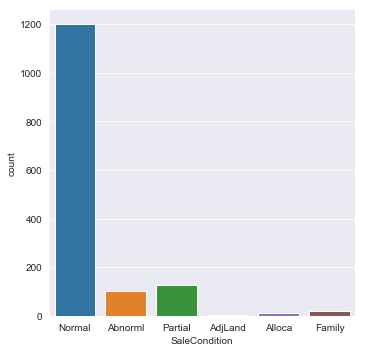

In [60]:
sns.factorplot('SaleCondition',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


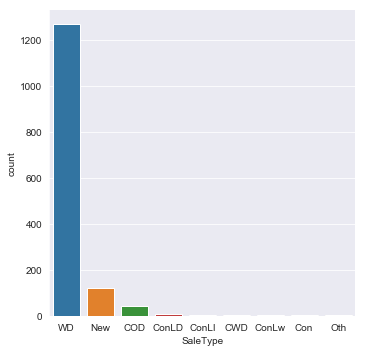

In [61]:
sns.factorplot('SaleType',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


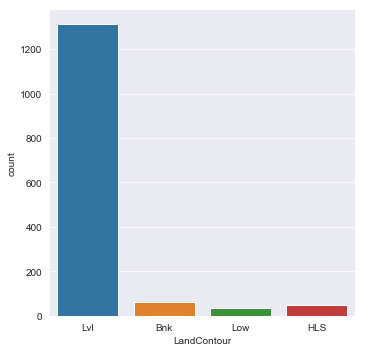

In [62]:
sns.factorplot('LandContour',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


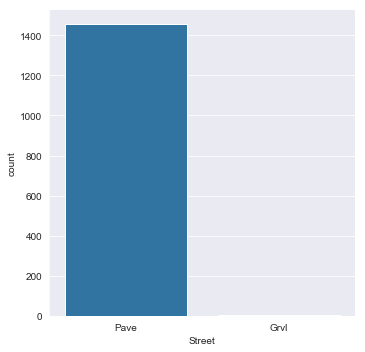

In [63]:
sns.factorplot('Street',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


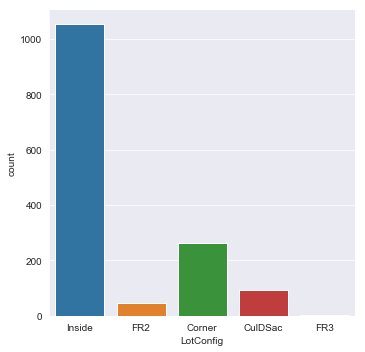

In [64]:
sns.factorplot('LotConfig',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


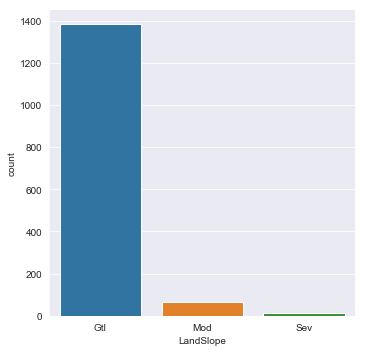

In [65]:
sns.factorplot('LandSlope',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


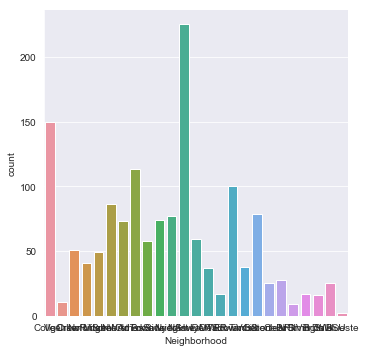

In [66]:
sns.factorplot('Neighborhood',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


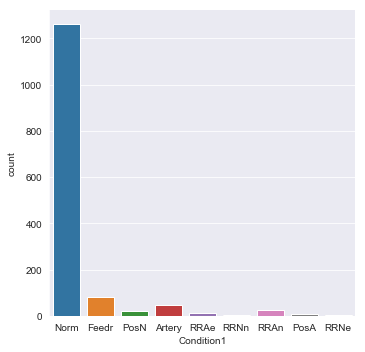

In [67]:
sns.factorplot('Condition1',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


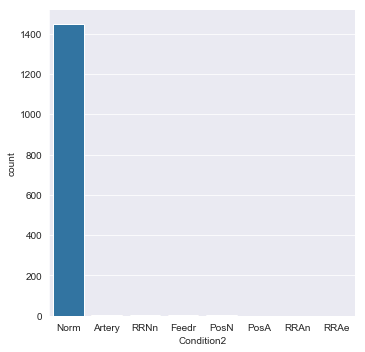

In [68]:
sns.factorplot('Condition2',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


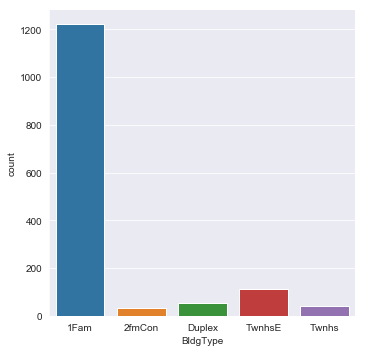

In [69]:
sns.factorplot('BldgType',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


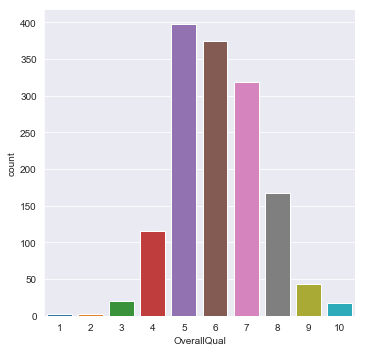

In [70]:
sns.factorplot('OverallQual',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


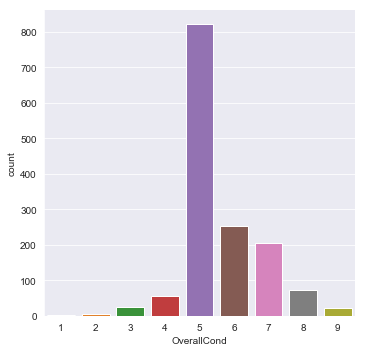

In [71]:
sns.factorplot('OverallCond',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


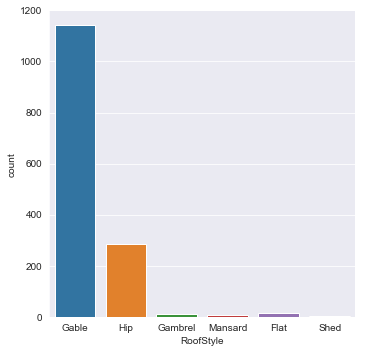

In [72]:
sns.factorplot('RoofStyle',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


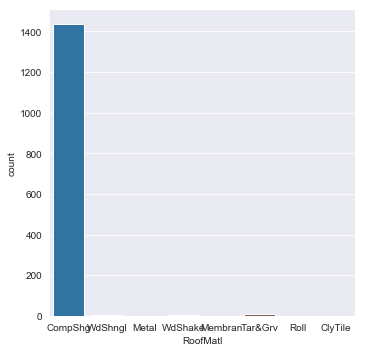

In [73]:
sns.factorplot('RoofMatl',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


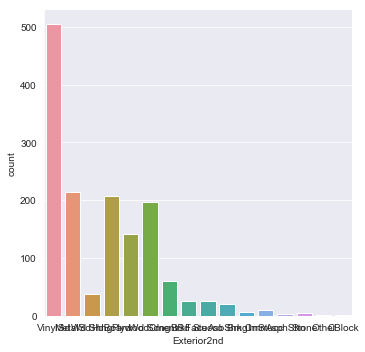

In [74]:
sns.factorplot('Exterior2nd',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


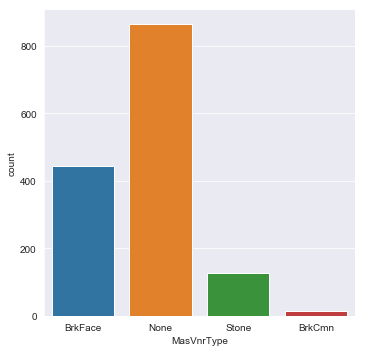

In [75]:
sns.factorplot('MasVnrType',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


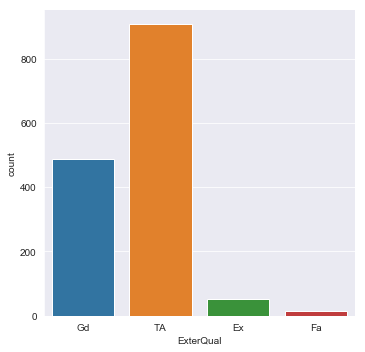

In [76]:
sns.factorplot('ExterQual',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


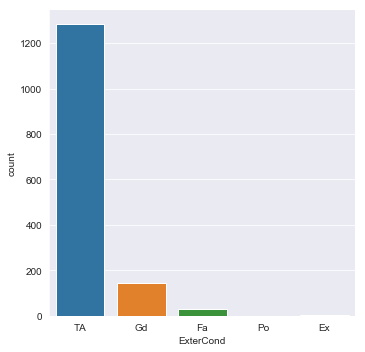

In [77]:
sns.factorplot('ExterCond',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


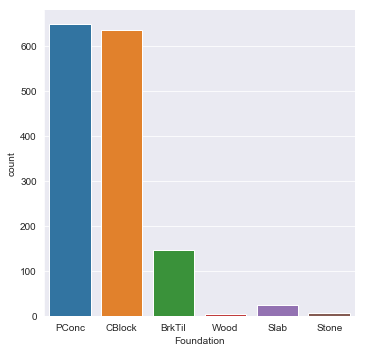

In [78]:
sns.factorplot('Foundation',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


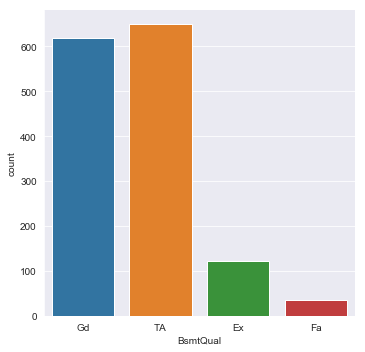

In [79]:
sns.factorplot('BsmtQual',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


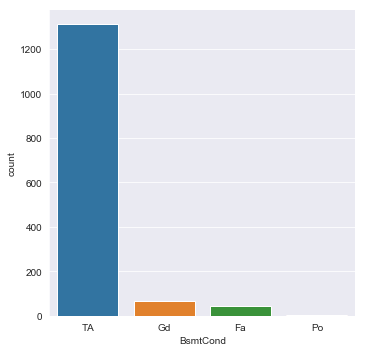

In [80]:
sns.factorplot('BsmtCond',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


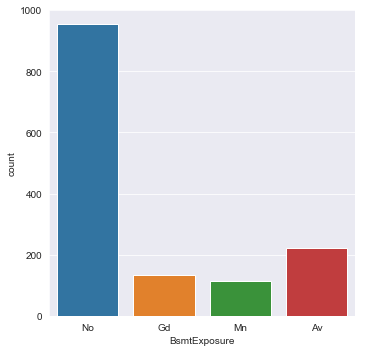

In [81]:
sns.factorplot('BsmtExposure',data=housetrain,kind='count')

In [82]:
housetrain.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


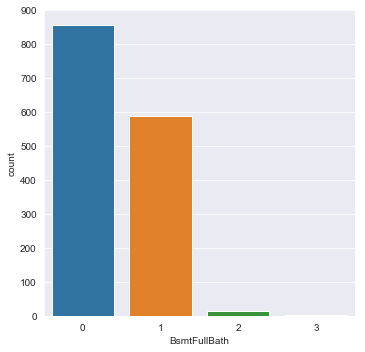

In [83]:
sns.factorplot('BsmtFullBath',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


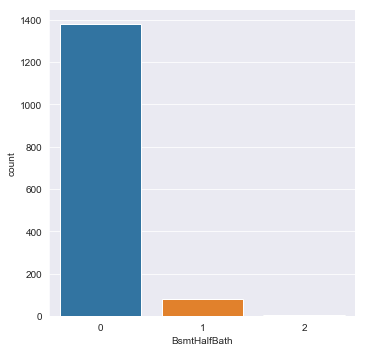

In [84]:
sns.factorplot('BsmtHalfBath',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


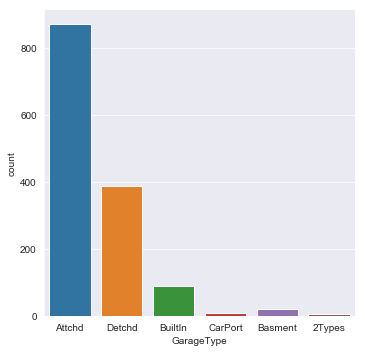

In [85]:
sns.factorplot('GarageType',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


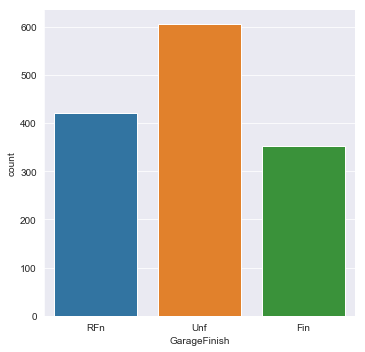

In [86]:
sns.factorplot('GarageFinish',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


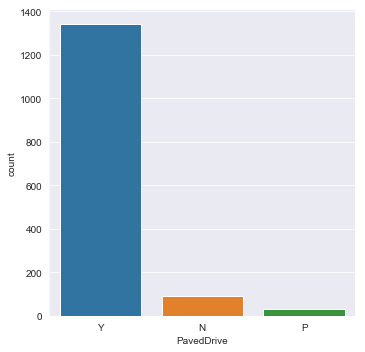

In [87]:
sns.factorplot('PavedDrive',data=housetrain,kind='count')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


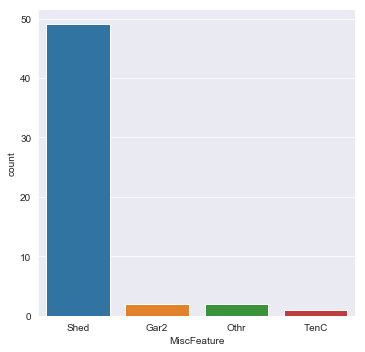

In [88]:
sns.factorplot('MiscFeature',data=housetrain,kind='count')

In [89]:
train=housetrain

In [90]:
test=pd.read_csv('test.csv')

In [91]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [92]:
frames=[train,test]

In [93]:
merge=pd.concat(frames,ignore_index=True)

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [94]:
merge

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [95]:
Y=train['SalePrice']

In [96]:
merge=merge.drop('SalePrice',axis=1)

In [97]:
merge3=merge

In [98]:
merge=merge.drop(['Utilities','Street','LandSlope','BldgType','OverallQual','RoofMatl','BsmtCond','BsmtUnfSF','Heating','Electrical','BsmtHalfBath','KitchenAbvGr','GarageYrBlt','MiscFeature'],axis=1)

In [99]:
merge['Age']=merge['YrSold']-merge['YearBuilt']
merge3['Age']=merge3['YrSold']-merge3['YearBuilt']

In [100]:
merge=merge.drop(['YrSold','MoSold','YearBuilt'],axis=1)
merge3=merge3.drop(['YrSold','MoSold','YearBuilt'],axis=1)

In [101]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 64 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtQual         2838 non-null object
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
Fence            571 non-null object
FireplaceQu      1499 non-null object
Fireplaces       2919 non-null int64
Foundation       2919 no

In [102]:
merge1=pd.get_dummies(data=merge)

In [103]:
merge.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,PoolQC,RoofStyle,SaleCondition,SaleType,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearRemodAdd,Age
0,856,854,0,NaN,3,No,706.0,0.0,GLQ,Unf,...,NaN,Gable,Normal,WD,0,8,856.0,0,2003,5
1,1262,0,0,NaN,3,Gd,978.0,0.0,ALQ,Unf,...,NaN,Gable,Normal,WD,0,6,1262.0,298,1976,31
2,920,866,0,NaN,3,Mn,486.0,0.0,GLQ,Unf,...,NaN,Gable,Normal,WD,0,6,920.0,0,2002,7
3,961,756,0,NaN,3,No,216.0,0.0,ALQ,Unf,...,NaN,Gable,Abnorml,WD,0,7,756.0,0,1970,91
4,1145,1053,0,NaN,4,Av,655.0,0.0,GLQ,Unf,...,NaN,Gable,Normal,WD,0,9,1145.0,192,2000,8


In [104]:
merge2=pd.get_dummies(merge)

In [105]:
merge3=pd.get_dummies(data=merge3)

In [106]:
merge2.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,EnclosedPorch,Fireplaces,FullBath,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,856,854,0,3,706.0,0.0,1.0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,1262,0,0,3,978.0,0.0,0.0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
2,920,866,0,3,486.0,0.0,1.0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
3,961,756,0,3,216.0,0.0,1.0,272,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1145,1053,0,4,655.0,0.0,1.0,0,1,2,...,0,0,0,0,0,0,0,0,0,1


In [107]:
trainf=merge2.head(1460)

In [108]:
train3=merge3.head(1460)

In [109]:
testf=merge2.tail(1459)

In [110]:
test3=merge3.tail(1459)

In [111]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [112]:
X_train, X_test, y_train, y_test =train_test_split(trainf,Y,random_state=59,train_size=0.7)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [113]:
pred1=RidgeCV()

In [114]:
pred1.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [115]:
pred1.score(X_test,y_test)

0.8658158090754192

In [116]:
pred2=RidgeCV()
pred2.fit(trainf,Y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [117]:
testf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Columns: 243 entries, 1stFlrSF to SaleType_WD
dtypes: float64(8), int64(22), uint8(213)
memory usage: 645.5 KB


In [118]:
testf=testf.fillna(testf.mean())

In [119]:
test3=test3.fillna(testf.mean())

In [120]:
res1=pred2.predict(testf)

In [121]:
res1

array([ 98797.65140645, 136860.64324678, 186706.6515011 , ...,
       152476.43550986, 105280.68943331, 211456.55625956])

In [122]:
r1={'Id':np.arange(1461,2920,1),'SalePrice':res1}

In [123]:
rlt1=pd.DataFrame(data=r1)

In [124]:
rlt1=rlt1.to_csv(r'C:\Users\hp\house_prices\rlt1.csv')

In [125]:
pred3=RidgeCV(normalize='True')

In [126]:
pred3.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize='True', scoring=None, store_cv_values=False)

In [127]:
pred3.score(X_test,y_test)

0.8567821742614146

In [128]:
res3=pred3.predict(testf)

In [129]:
r3={'Id':np.arange(1461,2920,1),'SalePrice':res3}

In [130]:
rlt3=pd.DataFrame(data=r3)

In [131]:
rlt3=rlt3.to_csv(r'C:\Users\hp\house_prices\rlt3.csv')

In [132]:
res2=pred1.predict(testf)

In [133]:
r2={'Id':np.arange(1461,2920,1),'SalePrice':res2}

In [134]:
rlt2=pd.DataFrame(data=r2)

In [135]:
rlt2=rlt2.to_csv(r'C:\Users\hp\house_prices\rlt2.csv')

In [136]:
pred4=RidgeCV(normalize='True')

In [137]:
pred4.fit(trainf,Y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize='True', scoring=None, store_cv_values=False)

In [138]:
res4=pred4.predict(testf)

In [139]:
r4={'Id':np.arange(1461,2920,1),'SalePrice':res4}

In [140]:
rlt4=pd.DataFrame(data=r4)

In [141]:
rlt4=rlt4.to_csv(r'C:\Users\hp\house_prices\rlt4.csv')

In [142]:
pred5=ElasticNetCV(normalize='True')

In [143]:
pred5.fit(trainf,Y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=None, normalize='True', positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [144]:
res5=pred5.predict(testf)

In [145]:
r5={'Id':np.arange(1461,2920,1),'SalePrice':res5}

In [146]:
rlt5=pd.DataFrame(data=r5)

In [147]:
rlt5=rlt5.to_csv(r'C:\Users\hp\house_prices\rlt5.csv')

In [148]:
pred6=RidgeCV(alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75],normalize='True')

In [149]:
pred6.fit(trainf,Y)

RidgeCV(alphas=array([5.0e-02, 1.0e-01, 3.0e-01, 1.0e+00, 3.0e+00, 5.0e+00, 1.0e+01,
       1.5e+01, 3.0e+01, 5.0e+01, 7.5e+01]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize='True',
    scoring=None, store_cv_values=False)

In [150]:
res6=pred6.predict(testf)

In [151]:
r6={'Id':np.arange(1461,2920,1),'SalePrice':res6}

In [152]:
rlt6=pd.DataFrame(data=r6)

In [153]:
rlt6=rlt6.to_csv(r'C:\Users\hp\house_prices\rlt6.csv')

In [154]:
train3=train3.fillna(train3.mean())

In [155]:
pred7=RidgeCV(alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75],normalize='True')

In [156]:
pred7.fit(train3,Y)

RidgeCV(alphas=array([5.0e-02, 1.0e-01, 3.0e-01, 1.0e+00, 3.0e+00, 5.0e+00, 1.0e+01,
       1.5e+01, 3.0e+01, 5.0e+01, 7.5e+01]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize='True',
    scoring=None, store_cv_values=False)

In [157]:
test3=test3.fillna(test3.mean())

In [158]:
res7=pred7.predict(test3)

In [159]:
r7={'Id':np.arange(1461,2920,1),'SalePrice':res7}

In [160]:
rlt7=pd.DataFrame(data=r7)

In [161]:
rlt7=rlt7.to_csv(r'C:\Users\hp\house_prices\rlt7.csv')

In [162]:

pred8= LassoCV(normalize='True')

In [163]:
pred8.fit(train3,Y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize='True',
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [164]:
res8=pred8.predict(test3)

In [165]:
r8={'Id':np.arange(1461,2920,1),'SalePrice':res8}

In [166]:
rlt8=pd.DataFrame(data=r8)

In [167]:
rlt8=rlt8.to_csv(r'C:\Users\hp\house_prices\rlt8.csv')